In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [58]:
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [59]:
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [60]:
df = df.drop(['NationalITy', 'PlaceofBirth'], axis = 1)

In [61]:
df.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [63]:
df['Class'].loc[df.Class == 'Low-Level'] = 0.0
df['Class'].loc[df.Class == 'Middle-Level'] = 1.0
df['Class'].loc[df.Class == 'High-Level'] = 2.0

continuous_subset = df
continuous_subset['gender'] = np.where(df['gender']=='M',1,0)

continuous_subset['StageID'].loc[continuous_subset.StageID == 'lowerlevel'] = 0 
continuous_subset['StageID'].loc[continuous_subset.StageID == 'MiddleSchool'] = 1
continuous_subset['StageID'].loc[continuous_subset.StageID == 'HighSchool'] = 2

continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-04'] = 4
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-07'] = 7
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-08'] = 8
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-06'] = 6
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-05'] = 5
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-09'] = 9
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-12'] = 12
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-11'] = 11
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-10'] = 10
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-02'] = 2

continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'A'] = 0
continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'B'] = 1
continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'C'] = 2

continuous_subset['Topic'].loc[continuous_subset.Topic == 'IT'] = 0
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Math'] = 1 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Arabic'] = 2
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Science'] = 3
continuous_subset['Topic'].loc[continuous_subset.Topic == 'English'] = 4
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Quran'] = 5
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Spanish'] = 6 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'French'] = 7
continuous_subset['Topic'].loc[continuous_subset.Topic == 'History'] = 8
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Biology'] = 9
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Chemistry'] = 10 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Geology'] = 11

continuous_subset['Semester'] = np.where(df['Semester']=='F',1,0)
continuous_subset['Relation'] = np.where(df['Relation']=='Father',1,0)
continuous_subset['ParentAnsweringSurvey'] = np.where(df['ParentAnsweringSurvey']=='Yes',1,0)
continuous_subset['ParentschoolSatisfaction'] = np.where(df['ParentschoolSatisfaction']=='Good',1,0)
continuous_subset['StudentAbsenceDays'] = np.where(df['StudentAbsenceDays']=='Under-7',1,0)

#continuous_subset['Class'].loc[continuous_subset.Class == 'L'] = 0
#continuous_subset['Class'].loc[continuous_subset.Class == 'M'] = 1
#continuous_subset['Class'].loc[continuous_subset.Class == 'H'] = 2

y = np.array(df['Class'])
continuous_subset = continuous_subset.drop('Class', axis = 1)
X = np.array(continuous_subset).astype('float64')
X.shape

/Users/kpham/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(480, 14)

In [67]:
print(continuous_subset.columns)

Index(['gender', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester',
       'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')


In [68]:
continuous_subset.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,0,4,0,0,1,1,15,16,2,20,1,1,1
1,1,0,4,0,0,1,1,20,20,3,25,1,1,1
2,1,0,4,0,0,1,1,10,7,0,30,0,0,0
3,1,0,4,0,0,1,1,30,25,5,35,0,0,0
4,1,0,4,0,0,1,1,40,50,12,50,0,0,0


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(
         X, y)

# Fit the model on the trainng data.
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(lr.predict(X_train), y_train))

0.744444444444


In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [71]:
yf = rf.predict(X_test)
#yf is your predicted score

zip(yf, y_test)
# zip attaches two lists

(yf == y_test).sum()

90

In [72]:
y_test.shape

(120,)

In [73]:
90 / 120

0.75

In [75]:
importances = rf.feature_importances_
importances

array([ 0.03851128,  0.02226538,  0.03760369,  0.02301591,  0.05444498,
        0.01460708,  0.05890445,  0.12480529,  0.17704069,  0.11508184,
        0.09387844,  0.04567162,  0.03415811,  0.16001124])

In [76]:
X_train.shape

(360, 14)

Feature ranking:
1. feature 8 (0.177041)
2. feature 13 (0.160011)
3. feature 7 (0.124805)
4. feature 9 (0.115082)
5. feature 10 (0.093878)
6. feature 6 (0.058904)
7. feature 4 (0.054445)
8. feature 11 (0.045672)
9. feature 0 (0.038511)
10. feature 2 (0.037604)
11. feature 12 (0.034158)
12. feature 3 (0.023016)
13. feature 1 (0.022265)
14. feature 5 (0.014607)


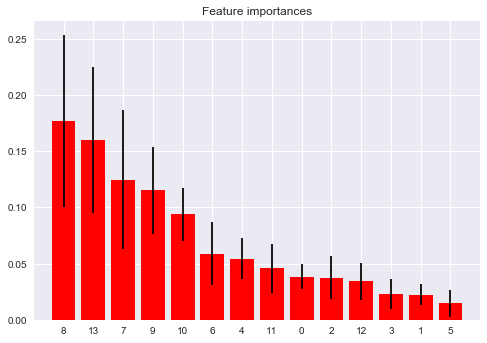

In [77]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()